In [26]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [19]:
df = pd.read_csv("price_FB.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
1974,2020-03-25,158.919998,162.990005,153.059998,156.210007,156.210007,35184300
1975,2020-03-26,158.250000,164.000000,157.020004,163.339996,163.339996,26556800
1976,2020-03-27,158.199997,160.089996,154.750000,156.789993,156.789993,24879900
1977,2020-03-30,159.179993,166.750000,158.059998,165.949997,165.949997,22515200


In [20]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979 entries, 0 to 1978
Data columns (total 7 columns):
Date         1979 non-null object
Open         1979 non-null float64
High         1979 non-null float64
Low          1979 non-null float64
Close        1979 non-null float64
Adj Close    1979 non-null float64
Volume       1979 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.4+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [21]:
print(df['Volume'])
print(df['Volume'].iloc[10:20])  #range row 10 to 20

0       573576400
1       168192700
2       101786600
3        73600000
4        50237200
          ...    
1974     35184300
1975     26556800
1976     24879900
1977     22515200
1978     23644700
Name: Volume, Length: 1979, dtype: int64
10    35230300
11    42473400
12    61489200
13    26159500
14    38034000
15    28219600
16    15816800
17    17102800
18    16855000
19    43563800
Name: Volume, dtype: int64


In [36]:
df["200ma"] = df["Adj Close"].rolling(window=200).mean()

In [37]:
df["50ma"] = df["Adj Close"].rolling(window=50).mean()
df

,Date,Open,High,Low,Close,Adj Close,Volume,200na,50ma,200ma
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,NaN,NaN,NaN
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,NaN,NaN,NaN
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,NaN,NaN,NaN
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,NaN,NaN,NaN
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1974,2020-03-25,158.919998,162.990005,153.059998,156.210007,156.210007,35184300,193.27895,195.3616,193.27895
1975,2020-03-26,158.250000,164.000000,157.020004,163.339996,163.339996,26556800,193.20515,194.2472,193.20515
1976,2020-03-27,158.199997,160.089996,154.750000,156.789993,156.789993,24879900,193.11390,192.9600,193.11390
1977,2020-03-30,159.179993,166.750000,158.059998,165.949997,165.949997,22515200,193.05630,191.8436,193.05630


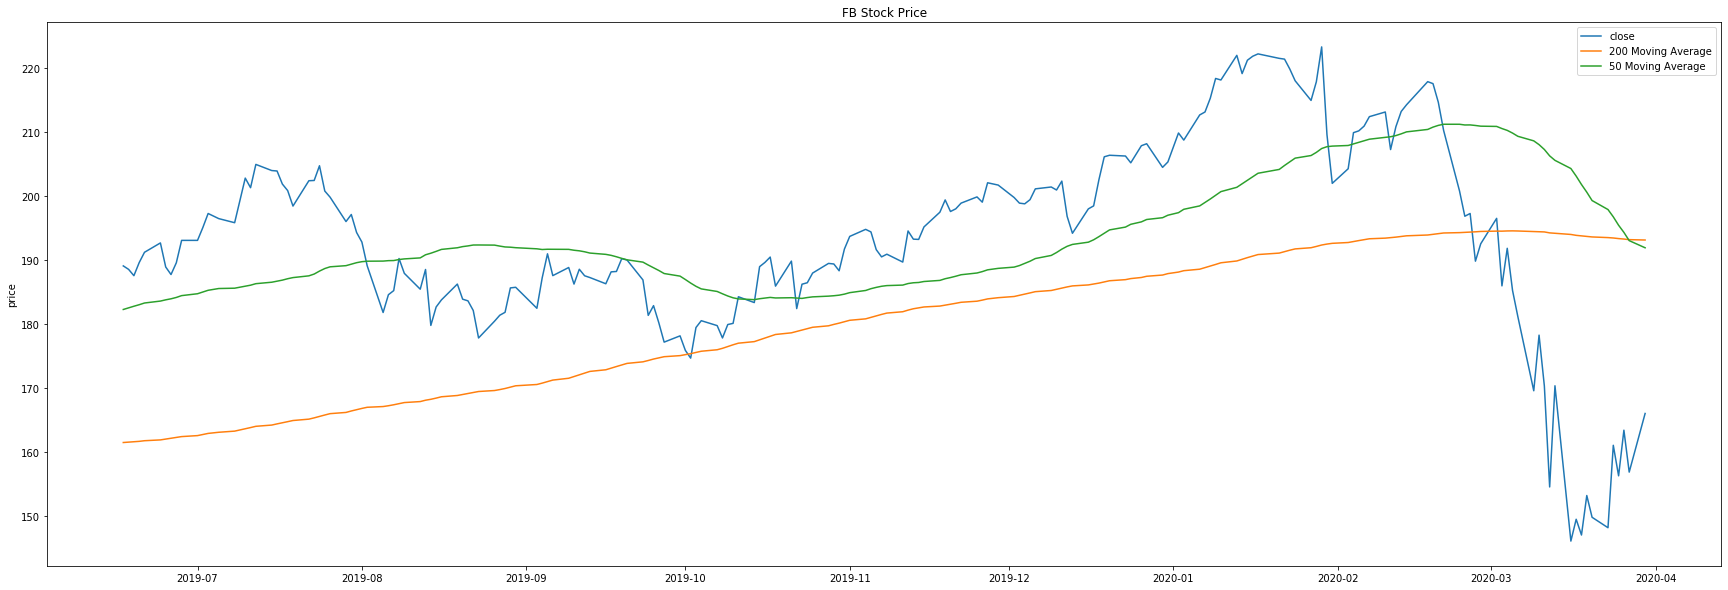

In [41]:
#make graph
plt.figure(figsize=(30,10))
dates = [datetime.strptime(d, "%Y-%m-%d").date() for d in df['Date'].iloc[-200:-1]]

plt.plot(dates, df["Adj Close"].iloc[-200:-1], label="close" )  #draw chart  #iloc[-200:-1] end start 200
plt.plot(dates, df["200ma"].iloc[-200:-1], label="200 Moving Average")
plt.plot(dates, df["50ma"].iloc[-200:-1], label="50 Moving Average")

plt.title("FB Stock Price")
plt.ylabel("time")
plt.ylabel("price")

plt.legend(loc="best")  # explonation line
plt.show()